In [1]:
import numpy as np
import pandas as pd
from pandas.errors import ParserError
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def data_deal(pandas_df):
    try:
        pandas_df[['开盘', '收盘', '高', '低']] = pandas_df[['开盘', '收盘', '高', '低']].apply(lambda x: x.str.replace(',', '')).astype('float')
    except AttributeError:
        pass
    
    pandas_df['日期'] = pandas_df['日期'].apply(lambda x: x.replace('年', '-').replace('月', '-').replace('日', ''))
    pandas_df['日期'] = pd.to_datetime(pandas_df['日期'])

    pandas_df['涨跌幅'] = pandas_df['涨跌幅'].map(lambda x: str(x)[:-1]).astype('float')
    pandas_df.set_index(['日期'], inplace=True)
    return pandas_df

In [28]:
def cal_con_days(returns):
    returns = np.sign(returns)
    c_days = []
    day = 1
    sign = np.sign(returns[0])
    for i in range(0, len(returns)-1):
        if returns[i] != returns[i+1]:
            c_days.append(day * sign)
            day = 1
            sign *= -1
        else:
            day += 1
    c_days.append(day)
    return np.array(c_days)

In [29]:
def create_df(arr):
    c_days = pd.DataFrame({'连续天数': dict(Counter(arr)).keys(),
                           '出现次数': dict(Counter(arr)).values()}
                         )
    c_days['占比'] = (100 * c_days['出现次数'] / sum(c_days['出现次数'])).round(2).map('{}%'.format)
    c_days['涨跌'] = c_days.apply(lambda x: 'red' if x['连续天数'] > 0 else 'green', axis=1)
    return c_days

In [33]:
def plots(df):
    ret = cal_con_days(df['涨跌幅'])
    print('当前已连续增长（或下跌）天数：', ret[0])
    dataframe = create_df(ret)
    fig, axes = plt.subplots(1, 2, figsize=(30, 9), dpi=500)
    p = axes[0].bar(dataframe.连续天数, dataframe.出现次数, color=dataframe.涨跌, alpha=.6)
    axes[0].bar_label(p, labels=dataframe.占比)
    axes[1].plot(df['收盘'])
    axes[0].set_xticks(ticks=dataframe.连续天数)
    plt.show()

In [34]:
IXIC = pd.read_csv('纳斯达克综合指数历史数据.csv')
IXIC = data_deal(IXIC)

当前已连续增长（或下跌）天数： -1.0


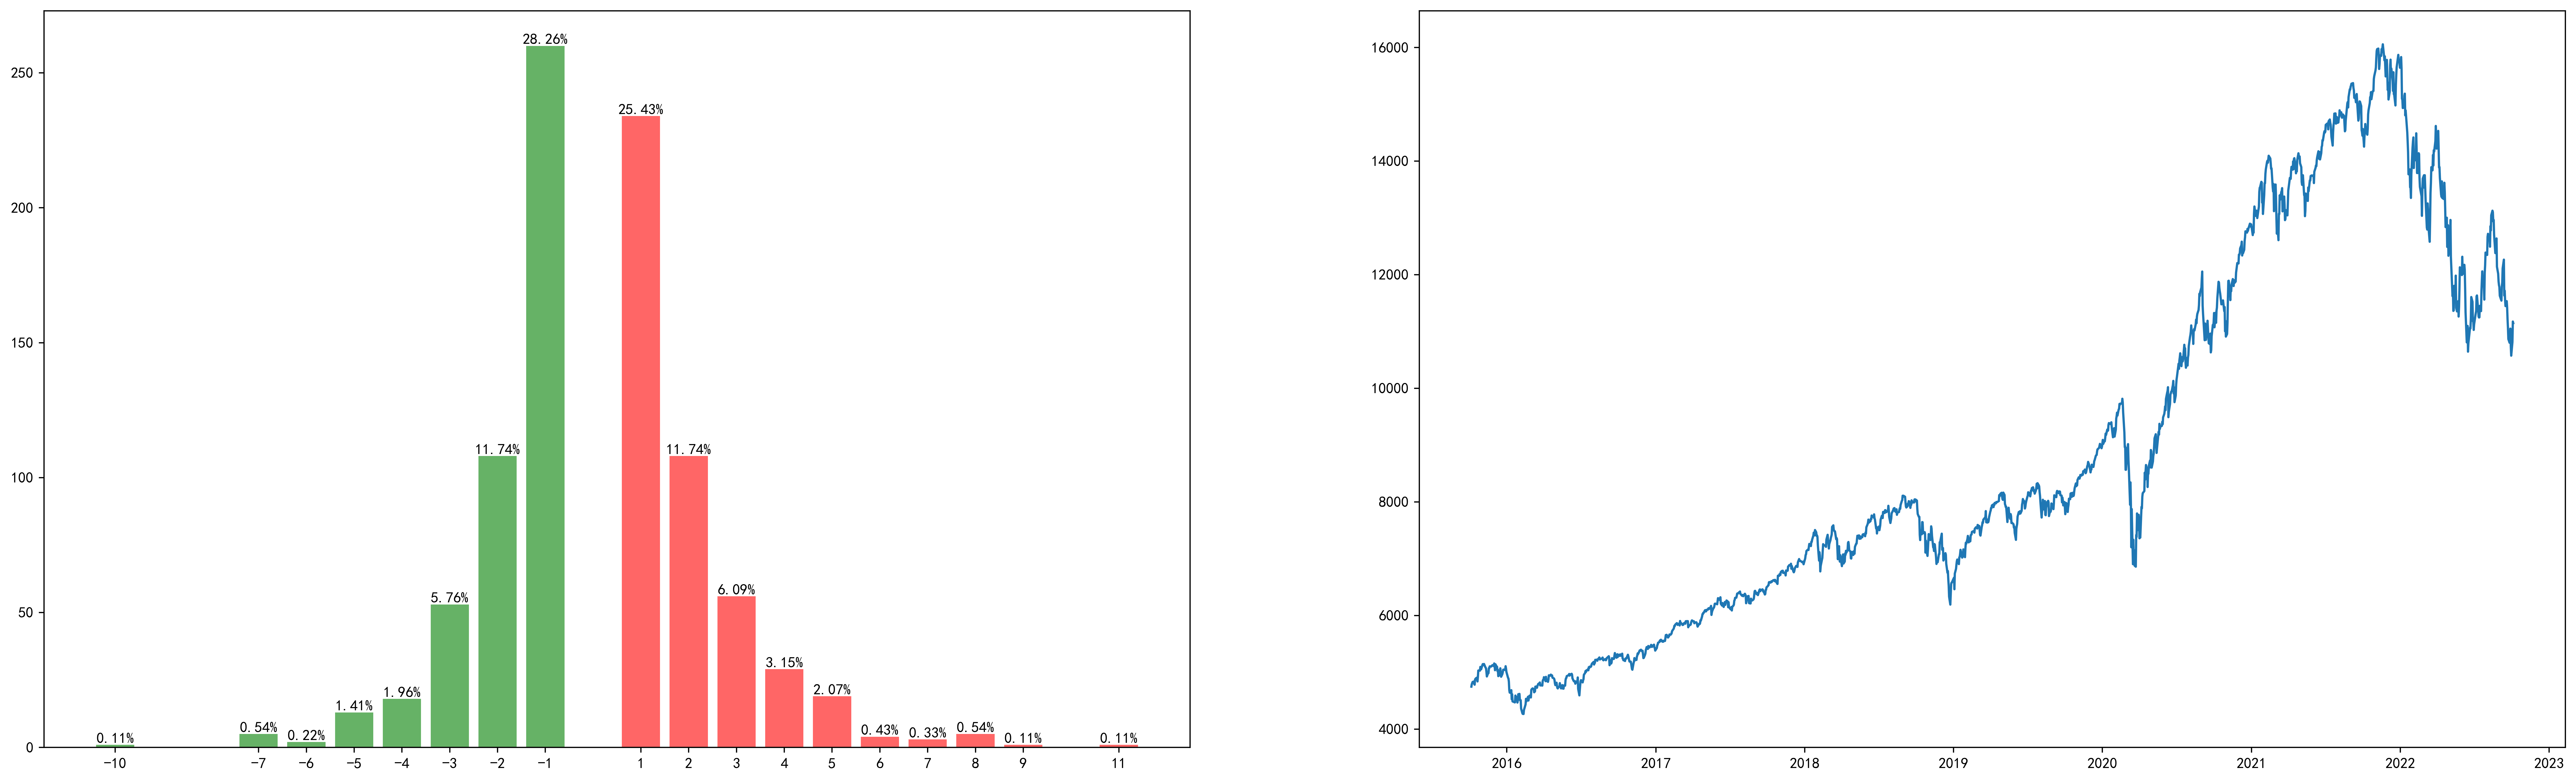

In [35]:
plots(IXIC)

当前已连续增长（或下跌）天数： 1.0


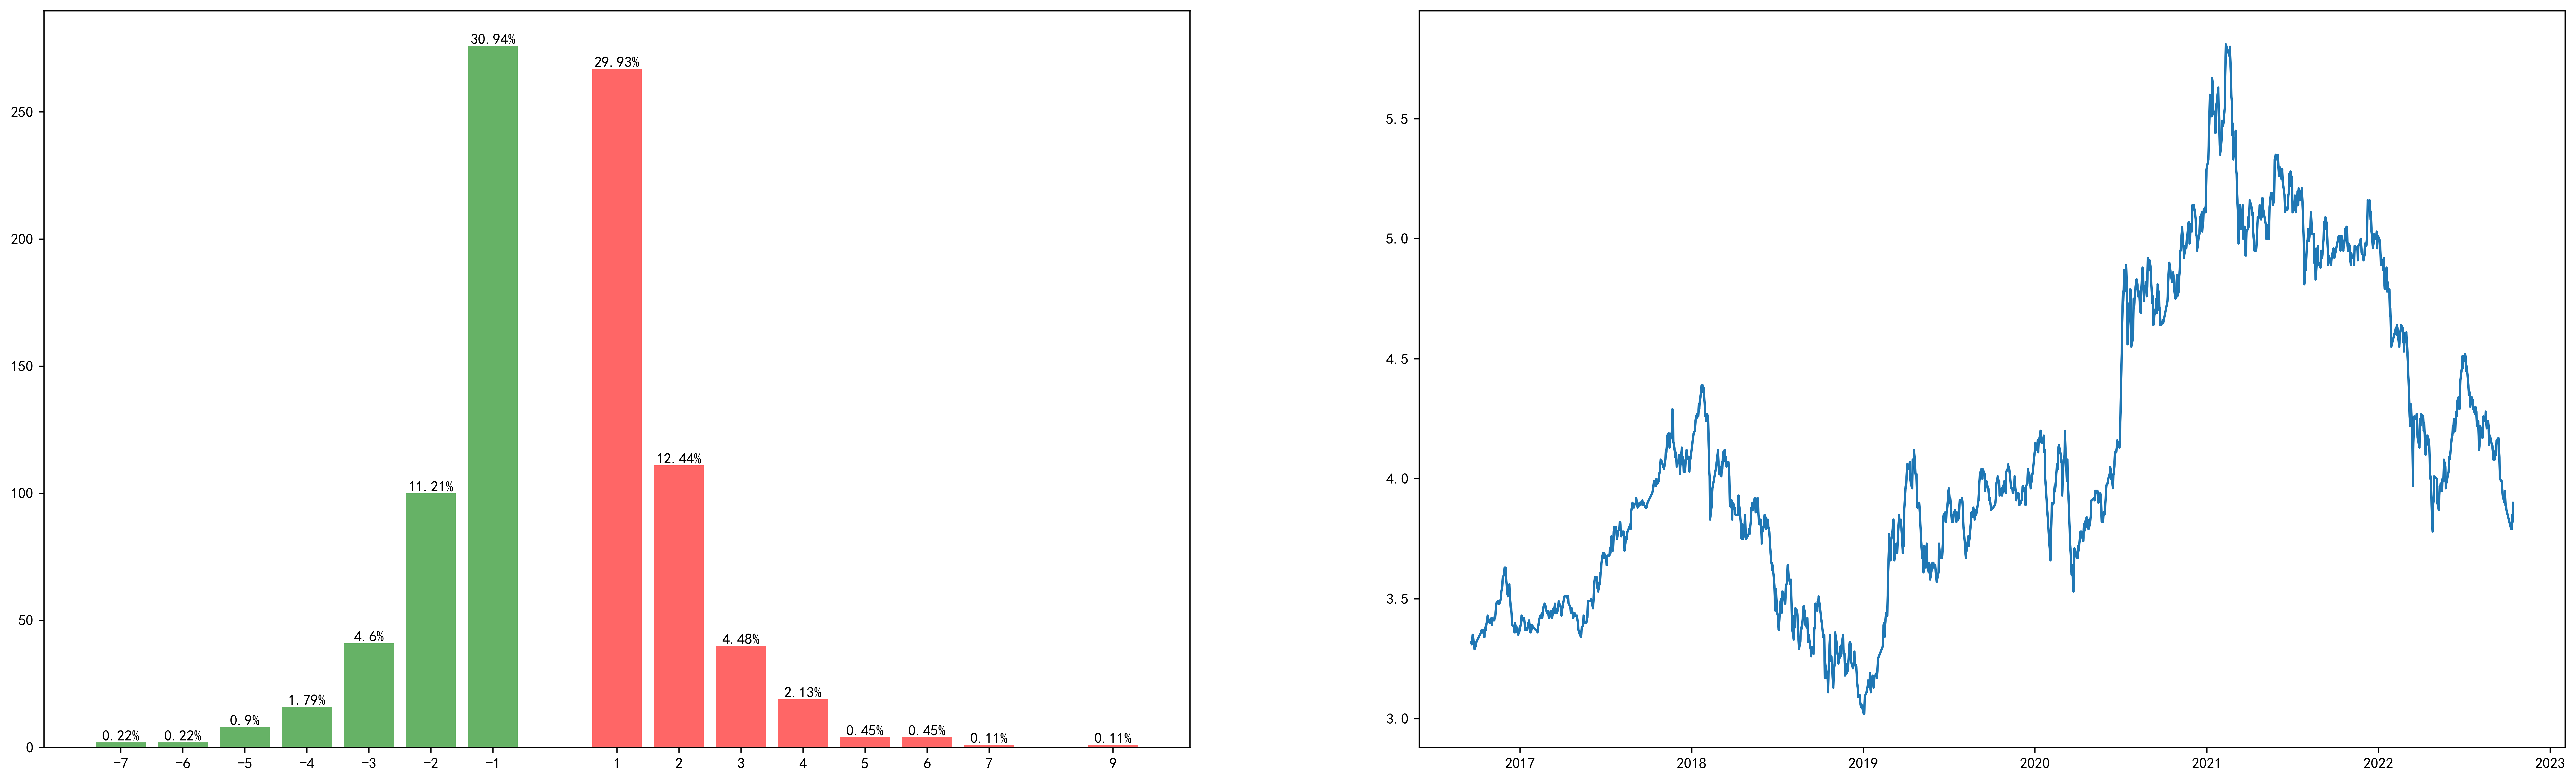

In [36]:
history510300 = pd.read_csv('510300.csv')
history510300 = data_deal(history510300)
plots(history510300)

当前已连续增长（或下跌）天数： 4.0


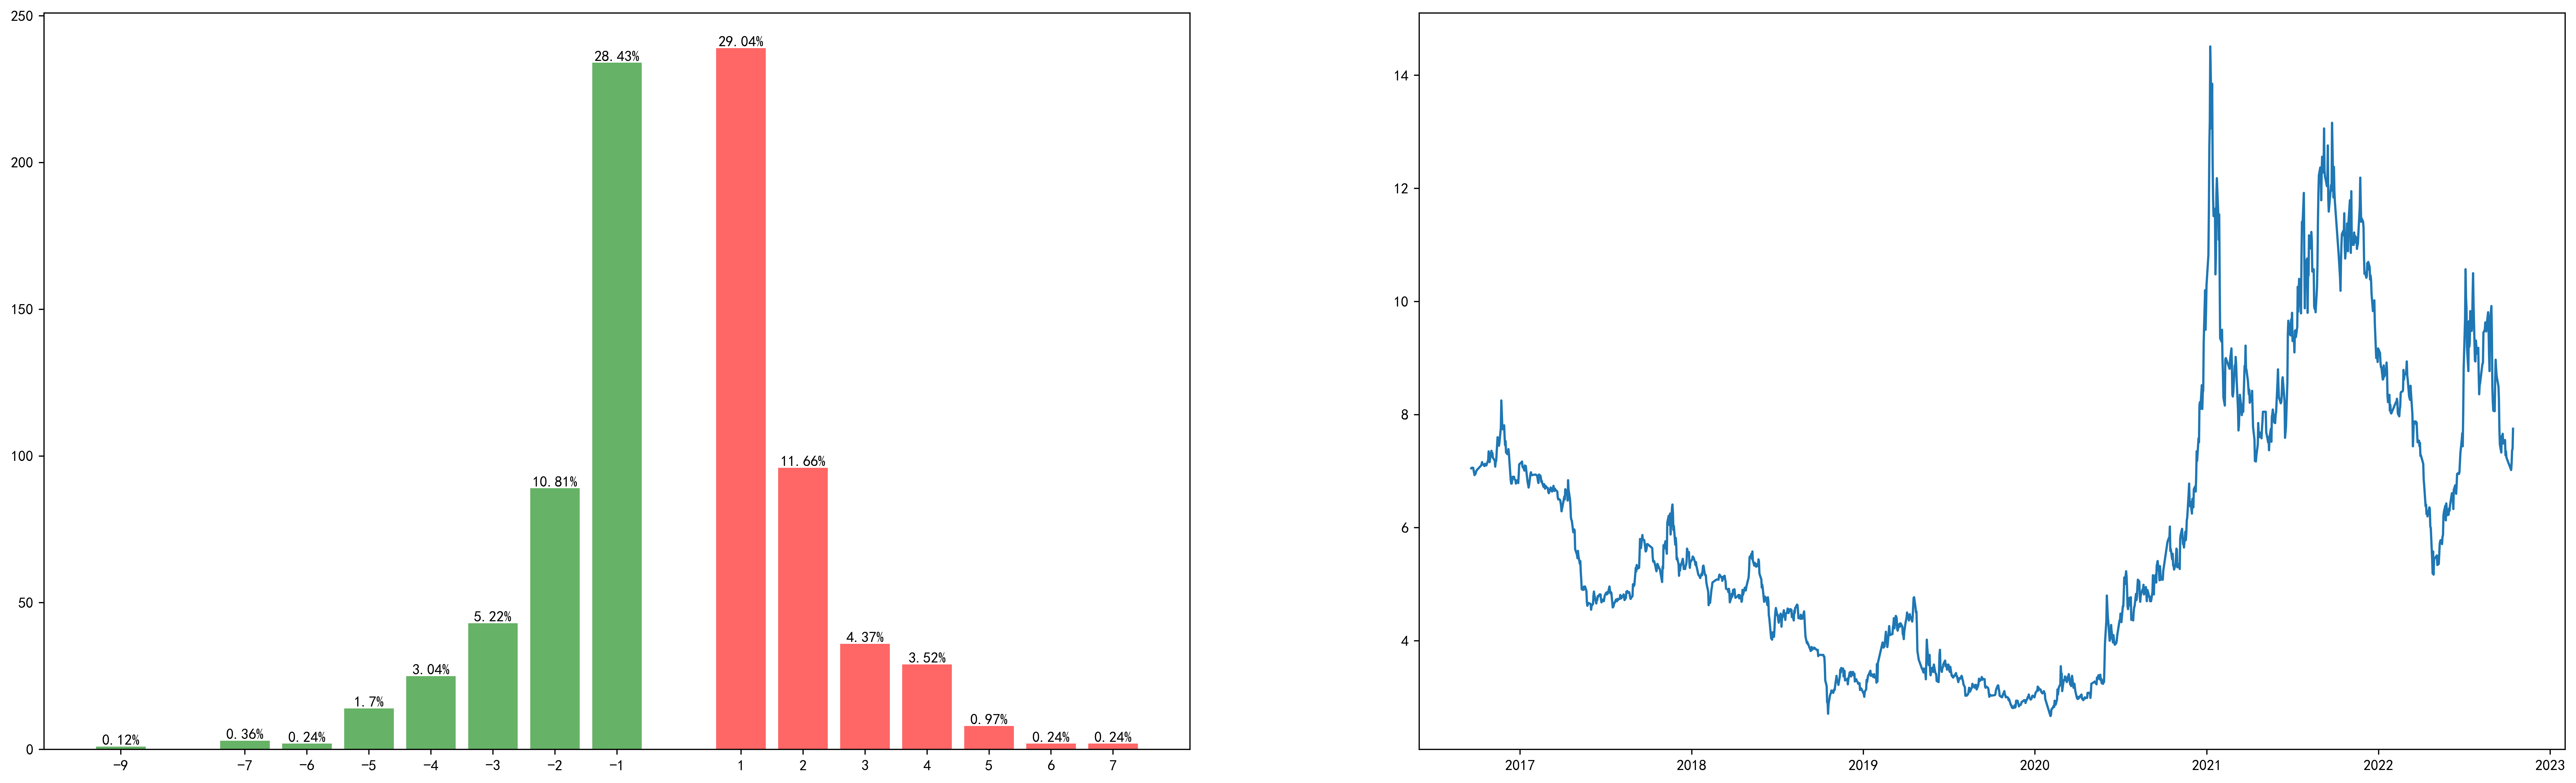

In [37]:
history601908 = pd.read_csv('601908.csv')
history601908 = data_deal(history601908)
plots(history601908)